## Lecture des donnes brute

In [12]:
import pandas as pd
import numpy as np


## Chargement des données qui proviennent des fichiers csv

In [13]:
tableRestaurants = pd.read_csv('restaurants.csv')
tableAvis = pd.read_csv('avis.csv')
tableCategories = pd.read_csv('categories.csv')
tableCheckin = pd.read_csv('checkin.csv')
tableHoraire = pd.read_csv('horaires.csv')
tableServices = pd.read_csv('services.csv')
tableUtilisateurs = pd.read_csv('utilisateurs.csv')




## Création du dataframe qui va servir de dataset final

In [14]:
ownMadeTable = pd.DataFrame()
ownMadeTable['restaurant_id'] = tableRestaurants['restaurant_id']
ownMadeTable['ville'] = tableRestaurants['ville']
ownMadeTable['Qualite'] = tableRestaurants['moyenne_etoiles']





In [15]:
# Filtrer les avis avec 'etoiles' > 4 (avis positifs)
avis_filtrés = tableAvis[tableAvis['etoiles'] > 4]

# Nombre total d'avis pour chaque restaurant
avis_total = tableAvis.groupby('restaurant_id')['etoiles'].count()

# Nombre d'avis positifs pour chaque restaurant (avis avec une note > 4)
avis_count = avis_filtrés.groupby('restaurant_id')['etoiles'].count()

# Map les comptages des avis positifs et des avis totaux dans ownMadeTable
ownMadeTable['positive_review'] = ownMadeTable['restaurant_id'].map(avis_count).fillna(0)
ownMadeTable['review_count_total'] = ownMadeTable['restaurant_id'].map(avis_total).fillna(0)

# Calcul du pourcentage d'avis favorables
ownMadeTable['positive_ratio'] = round((
    ownMadeTable['positive_review'] / ownMadeTable['review_count_total'] * 100
).fillna(0)  # Remplacer les valeurs NaN par 0 (par exemple, si un restaurant n'a pas d'avis)
, 2)
# Affichage de la table mise à jour
ownMadeTable


,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14.0,72,19.44
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67.0,108,62.04
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10.0,49,20.41
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9.0,36,25.00
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26.0,88,29.55
...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2.0,6,33.33
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3.0,11,27.27
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4.0,11,36.36
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10.0,18,55.56


In [16]:
restaurant_name_counts = tableRestaurants['nom'].value_counts()

# Now, create the 'is_chain' column in ownMadeTable
ownMadeTable['is_chain'] = ownMadeTable['restaurant_id'].map(
    lambda x: restaurant_name_counts[tableRestaurants.loc[tableRestaurants['restaurant_id'] == x, 'nom'].values[0]] >= 3
).fillna(False)

# Show the resulting ownMadeTable
ownMadeTable



,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio,is_chain
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14.0,72,19.44,True
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67.0,108,62.04,False
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10.0,49,20.41,False
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9.0,36,25.00,False
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26.0,88,29.55,False
...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2.0,6,33.33,True
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3.0,11,27.27,False
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4.0,11,36.36,False
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10.0,18,55.56,False


In [17]:
checkin_total = tableCheckin.groupby('restaurant_id')['restaurant_id'].count()

ownMadeTable['checkins_total'] = ownMadeTable['restaurant_id'].map(checkin_total).fillna(0)
ownMadeTable

,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio,is_chain,checkins_total
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14.0,72,19.44,True,181.0
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67.0,108,62.04,False,492.0
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10.0,49,20.41,False,157.0
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9.0,36,25.00,False,18.0
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26.0,88,29.55,False,110.0
...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2.0,6,33.33,True,37.0
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3.0,11,27.27,False,5.0
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4.0,11,36.36,False,32.0
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10.0,18,55.56,False,7.0


In [18]:
ownMadeTable.isna().sum()

restaurant_id         0
ville                 0
Qualite               0
positive_review       0
review_count_total    0
positive_ratio        0
is_chain              0
checkins_total        0
dtype: int64

In [19]:
df = tableHoraire

# Fonction pour convertir un horaire "HH:MM-HH:MM" en nombre d'heures décimales
def convert_to_hours(opening_hours):
    if not isinstance(opening_hours, str):
        return 0
    
    text = opening_hours.strip().lower()
    
    # Cas fermés
    if text in ["fermé", "closed", "na", "n/a", ""]:
        return 0
    
    # Cas 24/7
    if text in ["24/7", "24h", "24 heures", "24hrs"]:
        return 24

    total_hours = 0

    # Plusieurs créneaux séparés par virgule
    periods = text.replace(" ", "").split(',')

    for period in periods:
        try:
            start, end = period.split('-')
            start_hour, start_min = map(int, start.split(':'))
            end_hour, end_min = map(int, end.split(':'))

            start_minutes = start_hour * 60 + start_min
            end_minutes = end_hour * 60 + end_min

            # Si l'horaire dépasse minuit → ex: 20:00-02:00
            if end_minutes < start_minutes:
                end_minutes += 24 * 60

            total_hours += (end_minutes - start_minutes) / 60

        except:
            continue  # ignore les valeurs invalides

    return total_hours


# Appliquer cette fonction sur chaque jour de la semaine
for day in ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']:
    df[f'{day}_hours'] = df[day].apply(convert_to_hours)

# Calculer la moyenne des heures d'ouverture pour chaque restaurant
df['average_opening_hours'] = round(df[[f'{day}_hours' for day in ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']]].mean(axis=1))
df["average_opening_hours"] = np.floor(df["average_opening_hours"] + 0.5).astype(int)
# Afficher le résultat





averageHour = df.groupby('restaurant_id')['average_opening_hours'].mean()

ownMadeTable['average_opening_hours'] = ownMadeTable['restaurant_id'].map(averageHour).fillna(0)
ownMadeTable



,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio,is_chain,checkins_total,average_opening_hours
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14.0,72,19.44,True,181.0,0.0
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67.0,108,62.04,False,492.0,9.0
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10.0,49,20.41,False,157.0,10.0
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9.0,36,25.00,False,18.0,8.0
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26.0,88,29.55,False,110.0,8.0
...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2.0,6,33.33,True,37.0,8.0
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3.0,11,27.27,False,5.0,10.0
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4.0,11,36.36,False,32.0,0.0
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10.0,18,55.56,False,7.0,5.0


## Conversion  des types finaux  des colonnes du dataset final

In [24]:
ownMadeTable['positive_review'] = ownMadeTable['positive_review'].astype(int)
ownMadeTable['checkins_total'] = ownMadeTable['checkins_total'].astype(int)
ownMadeTable['average_opening_hours'] = ownMadeTable['average_opening_hours'].astype(int)
ownMadeTable['ville'] = ownMadeTable['ville'].astype('string')
ownMadeTable['restaurant_id'] = ownMadeTable['restaurant_id'].astype('string')


ownMadeTable

,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio,is_chain,checkins_total,average_opening_hours,elite_users_count
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14,72,19.44,True,181,0,6
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67,108,62.04,False,492,9,23
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10,49,20.41,False,157,10,26
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9,36,25.00,False,18,8,3
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26,88,29.55,False,110,8,36
...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2,6,33.33,True,37,8,1
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3,11,27.27,False,5,10,0
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4,11,36.36,False,32,0,1
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10,18,55.56,False,7,5,1


In [25]:
elite_users = tableUtilisateurs[tableUtilisateurs['elite'] == 1][['utilisateur_id']]


avis_elite = tableAvis[tableAvis['utilisateur_id'].isin(elite_users['utilisateur_id'])]


nb_elite_par_restaurant = avis_elite.groupby('restaurant_id')['utilisateur_id'].nunique().reset_index()


nb_elite_par_restaurant = nb_elite_par_restaurant.rename(columns={'utilisateur_id': 'nb_elite_users'})



elite_series = nb_elite_par_restaurant.set_index('restaurant_id')['nb_elite_users']

# Mapper correctement sur ownMadeTable
ownMadeTable['elite_users_count'] = ownMadeTable['restaurant_id'].map(elite_series).fillna(0).astype(int)

ownMadeTable



,restaurant_id,ville,Qualite,positive_review,review_count_total,positive_ratio,is_chain,checkins_total,average_opening_hours,elite_users_count
0,lCwqJWMxvIUQt1Re_tDn4w,Las Vegas,2.5,14,72,19.44,True,181,0,6
1,pd0v6sOqpLhFJ7mkpIaixw,Phoenix,4.0,67,108,62.04,False,492,9,23
2,0vhi__HtC2L4-vScgDFdFw,Calgary,3.5,10,49,20.41,False,157,10,26
3,t65yfB9v9fqlhAkLnnUXdg,Toronto,3.5,9,36,25.00,False,18,8,3
4,i7_JPit-2kAbtRTLkic2jA,Toronto,4.0,26,88,29.55,False,110,8,36
...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,McMurray,3.5,2,6,33.33,True,37,8,1
34264,Hq2edcOTjse7wjK2CwBijQ,Pointe-Claire,3.5,3,11,27.27,False,5,10,0
34265,7KlpgRjjAmVabPzxcExs0g,Phoenix,4.0,4,11,36.36,False,32,0,1
34266,0fY-zYyP2fDmp2YXFsuNTg,Sun Prairie,4.0,10,18,55.56,False,7,5,1


---

## 2. Graphiques

### 2.1 Statique

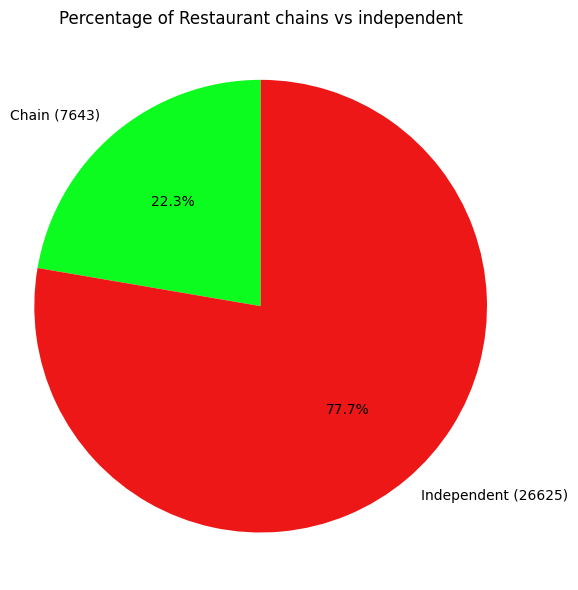

             Number  Percentage (%)
is_chain                           
Chain          7643            22.3
Independent   26625            77.7

Total number of restaurants : 34268


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Correspondance de la colonne is_chain de ownMadeTable avec la variable utilisée pour le diagramme circulaire
counts = ownMadeTable['is_chain'].map({True: 'Chain', False: 'Independent'}) \
            .value_counts().reindex(['Chain', 'Independent'], fill_value=0)


percent = counts / counts.sum() * 100
total_number_of_restaurants = len(ownMadeTable['restaurant_id'])

plt.figure(figsize=(6,6))
colors = ["#0cfc20", "#ee1717"]
plt.pie(counts, labels=[f"{lbl} ({n})" for lbl, n in counts.items()],
        autopct='%.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Restaurant chains vs independent')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Résumé des résultats du diagramme circulaire
resume = pd.DataFrame({
    'Number': counts.astype(int),
    'Percentage (%)': percent.round(1)
})
print(resume)
print(f"\nTotal number of restaurants : {total_number_of_restaurants}")

## 3. Analyse et Interprétation du graphique statique

### Observations clé du diagramme circulaire:

1. **Les restaurants indépendants représentent plus des deux tiers de l’ensemble des restaurants**
   - Le diagramme circulaire montre clairement que les restaurants indépendants constituent la grande majorité des établissements analysés, dépassant largement les chaînes.

2. **Les chaînes représentent moins du tiers des restaurants**
   - La catégorie des chaînes est nettement minoritaire dans l’ensemble du jeu de données.

3. **Une répartition déséquilibrée entre les deux catégories**
   - On observe une division nette et quantifiable entre les deux segments, avec un écart visuel et numérique important dans le diagramme.


---

### 2.2 Interactif

In [23]:
import pandas as pd
import plotly.graph_objects as go

# Charger les fichiers CSV contenant les avis et les restaurants
avis = pd.read_csv("avis.csv")
restaurants = pd.read_csv("restaurants.csv")

# Convertir la colonne "etoiles" en valeurs numériques (ignorer les erreurs)
avis["etoiles"] = pd.to_numeric(avis["etoiles"], errors="coerce")

# Filtrer seulement les avis positifs (4 étoiles et plus)
positive = avis[avis["etoiles"] >= 4]

# Compter le nombre d'avis positifs par restaurant
positive_counts = (
    positive.groupby("restaurant_id")
    .size()
    .reset_index(name="nb_positive")
)

# Fusionner les données des restaurants avec les comptes d'avis positifs
data = restaurants.merge(positive_counts, on="restaurant_id", how="left")

# Remplacer les valeurs manquantes par 0 et convertir en entier
data["nb_positive"] = data["nb_positive"].fillna(0).astype(int)

# Obtenir la liste triée des villes disponibles
cities = sorted(data["ville"].dropna().unique())

# Préparer un dictionnaire contenant le top 10 des restaurants par ville
top_by_city = {}
for city in cities:
    df = data[data["ville"] == city]
    df = df.sort_values("nb_positive", ascending=False).head(10)
    top_by_city[city] = df

# Créer une figure Plotly
fig = go.Figure()

# Ajouter un bar chart pour chaque ville (un seul visible au départ)
for i, city in enumerate(cities):
    df = top_by_city[city]

    fig.add_trace(go.Bar(
        x=df["nom"],
        y=df["nb_positive"],
        name=city,
        visible=True if i == 0 else False
    ))

# Créer les boutons permettant de changer la ville affichée
buttons = []
for i, city in enumerate(cities):
    visible = [False] * len(cities)
    visible[i] = True

    buttons.append(dict(
        label=city,
        method="update",
        args=[
            {"visible": visible},
            {"title": {"text": f"Top 10 Restaurants in {city} (Positive Reviews)", "x": 0.5}}
        ]
    ))

# Mise en page de la figure
fig.update_layout(
    title={
        "text": f"Top 10 Restaurants in {cities[0]} (Positive Reviews)",
        "x": 0.5
    },
    updatemenus=[dict(
        buttons=buttons,  # Ajouter le menu déroulant
        direction="down",
        x=0.0,
        y=1.15
    )],
    xaxis_title="Restaurants",
    yaxis_title="Number of Positive Reviews",
    xaxis=dict(tickangle=45)
)

# Afficher la figure dans le navigateur
fig.show(renderer="browser")


## 3. Analyse et Interprétation du graphique interactif
- Le graphique montre les dix restaurants les plus appréciés dans chaque ville selon le nombre d’avis positifs. On observe que certaines villes possèdent un restaurant qui domine clairement, tandis que d’autres présentent une distribution plus équilibrée. Le nombre élevé d’avis favorables reflète davantage la popularité réelle que la simple note moyenne. Enfin, les variations entre les villes suggèrent que l’engagement des utilisateurs Yelp diffère selon la région et l’activité du marché local.